# Komplexe Datentypen
Wie wir in der letzten Aufgabe gesehen haben, wäre es praktisch, eine Datenstruktur zu haben, in der mehrere Elemente gespeichert werden können. Python bietet vier unterschiedliche Container Typen an, die wir uns nacheinander ansehen.
## Listen
Listen sind der wahrscheinlich am häufigsten verwendete Container. Listen werden stets mit eckigen Klammern initialisiert. Syntax: 
```python
my_list = [] # empty list
my_list = [1, 2, 3]
```
Alle Einträge erhalten einen **Index** der bei **Null** startet und einen eindeutigen Zugriff auf alle Elemente ermöglicht. Der Zugriff auf einen Index erfolgt wieder mit eckigen Klammern: `my_list[0]` liefert z.B. den Wert 1 zurück.

Die wichtigsten Operationen auf Listen sind das Anfügen eines Elementes am Ende mit `append(element)`, das Einfügen an einer beliebigen Stelle mit `insert(index, element)`, das Entfernen (des ersten Eintrages mit dem Wert *value*) mit `remove(value)`, das Entfernen eines Elementes nach Index mit `pop(index)` und das Sortieren mit `sort`.

Listen weisen an einigen Stellen ein Verhalten auf, das für die meisten zunächst sehr unintuitiv ist. Kenn man dieses Verhalten nicht, sucht man oft stundenlang nach Fehlern. Daher schauen wir uns folgende Code Beispiele etwas genauer an:
### advanced indexing
Oftmals möchte man bestimmte Bereiche aus Listen und nicht nur einzelne Werte erhalten. Dies funktioniert über folgende Syntax: `L[start:stop:step]` wie das folgende Beispiel zeigt. Wie so oft ist der erste Werte immer inclusive und der zweite exclusive:

In [15]:
L = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # index and value are identical
print(L[0:2]) # only start and stop
print(L[3:5]) # only start and stop
print(L[0:5:2]) # stepwidth 2
print(L[-3: -1]) # indexing from last to first with -
print(L[:5]) # first five
print(L[5:]) # everything from five onwards

[0, 1]
[3, 4]
[0, 2, 4]
[7, 8]
[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9]


### deep and shallow copy


In [14]:
list_1 = [i for i in range(10)]
print("list 1:", list_1)
list_2 = list_1
print("list 2:", list_2)
list_2.append(10)
print("list 2:", list_2)

list 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
list 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
list 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Welche Ausgabe ist bei der nächsten Ausgabe zu erwarten?

In [15]:
print("list 1:", list_1)
list_1.pop(0)
print("list 2:", list_2)

list 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
list 2: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Ein anderes Verhalten ergibt sich durch den Befehl `deepcopy`

In [16]:
import copy
list_3 = copy.deepcopy(list_1)
print("list 3:", list_3)
list_1.clear()
print("list 1:", list_1)
print("list 3", list_3)

list 3: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
list 1: []
list 3 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### kleine Laufzeitmessung:
An eine leere Liste sollen eine Millionen Elemente hinten oder vorne angefügt werden. Welches Laufzeitverhalten ist zu erwarten?

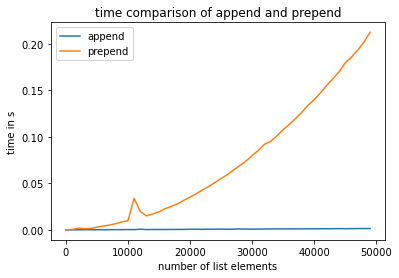

In [8]:
import time
import matplotlib.pyplot as plt
append_times = []
insert_times = []

x = [i for i in range(0, 5*10**4, 10**3)]
for n in x:
    # print(n, end=",")
    L = []
    start = time.process_time()
    for i in range(n):
        L.append(4242)
    stop = time.process_time()
    #print(f"append {stop-start:.4f} s")
    append_times.append(stop-start)

    L = []
    start = time.process_time()
    for i in range(n):
        L.insert(0, 4242)
    stop = time.process_time()
    # print(f"insert at beginning {stop-start:.4f} s")
    insert_times.append(stop-start)

plt.title("time comparison of append and prepend")
plt.plot(x, append_times, label="append")
plt.plot(x, insert_times, label="prepend")
plt.xlabel("number of list elements")
plt.ylabel("time in s")
plt.legend()
plt.savefig("plots/append_prepend_1.png")
plt.show()


## Tupel
Tupel funktionieren völlig analog zu Listen, sind aber unveränderlich und bieten daher einen geringeren Umfang an Operationen. Tupel werden mit runden Klammern initialisiert.

## Dictionaries
Dictionaries funktionieren analog zu Wörter oder Telefonbüchern. Anstelle von ganzzahligen Indizes wie bei Listen, gibt es bei Dicts beliebige **keys**, denen ein **value** zugeordnet wird. Syntax:
```python
mobile = {"Fabian": 123456789, "Thomas": 987654321}
```
Der Zugriff erfolgt wie gewohnt über eckige Klammern, in denen nun aber Strings und keine ganzzahligen Werte als Key bzw. Index stehen. Neue Elemente können ganz einfach über die Syntax `my_dict["new key"] = new_value` hinzugefügt werden.

## Sets
Sets sind Datenstrukturen mit ähnlichen Eigenschaften wie Mengen in der Mathematik. Sie sind Ansammlungen von Elementen ohne Reihenfolge und jedes Element kann nur ein mal vorkommen. Die häufigsten Anwendungen sind das Herausfiltern von Duplikaten aus Listen oder das Bilden von Schnitt (difference) oder Vereinigung (union). Sets werden ähnlich wie Dictionaries mit Mengenklammern initialisiert:
`my_set = {1, 3, 6, 7, 7, 3}`

# for-Schleife und range-Befehl
Eine wichtige Kontrollstruktur im Umgang mit komplexen Datentypen ist die for-Schleife. Diese wendet einen Anweisungsblock auf alle Elemente einer komplexen Datenstruktur an. For Schleifen haben also eine ähnliche Funktionalität wie while-Schleifen, haben aber oft eine kürzere Syntax. 
```python
for element in complex_datatype:
    do_something
```
*element* trägt dabei wirklich die einzelnen Werte und ist nicht bloß ein Index, wie die folgenden Beispiele erläutern:

In [4]:
L = [1, 2, 3, 4, 5]
new_list = []
for element in L:
    new_list.append(element**2)
    
for i in new_list:
    print("result:", i)


result: 1
result: 4
result: 9
result: 16
result: 25


Eine noch kürzere Syntax (an die man sich oft erst einmal gewöhnen muss) ist die sogenannte *list comprehension*:

In [6]:
numbers = [i for i in range(10)]
square_numbers = [i**2 for i in numbers]
print(numbers)
print(square_numbers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Eine der häufigsten Aufgaben ist es, alle natürlichen Zahlen zwischen einem Startwert und einem Endwert, ggf. mit einer bestimmten Schrittweite zu generieren. Dafür ist der Befehl `range(start, stop, step)` hervorragend geeignet. Dabei sind die Parameter *start* (default: 0) und step (default: 1) optional.

In [21]:
print(range(1, 24, 3)) # does not yield the intended result
print([range(1, 24, 3)]) # still not what we want
print([i for i in range(1, 24, 3)]) # works with list comprehension
print([i for i in range(1, 24)])
print([i for i in range(24)])

range(1, 24, 3)
[range(1, 24, 3)]
[1, 4, 7, 10, 13, 16, 19, 22]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
